# Assignment 3:

#### This assignment aims to deepen your understanding of core machine learning algorithms by implementing and evaluating K-Nearest Neighbors (KNN), Logistic Regression, Support Vector Machines (SVM) with various kernels, and ensemble methods such as Boosting and Bagging. You will experiment with different configurations, compare their performance, and evaluate the models using classification metrics. 

### Prepared By Qusay Taradeh 1212508, Ali Khalil 1210750

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

## Load and Describe the Mobile Price Classification dataset

#### *Note: Done by Qusay Taradeh 1212508

In [3]:
df = pd.read_csv("train.csv")
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Missing values

In [4]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

### Show Correlation

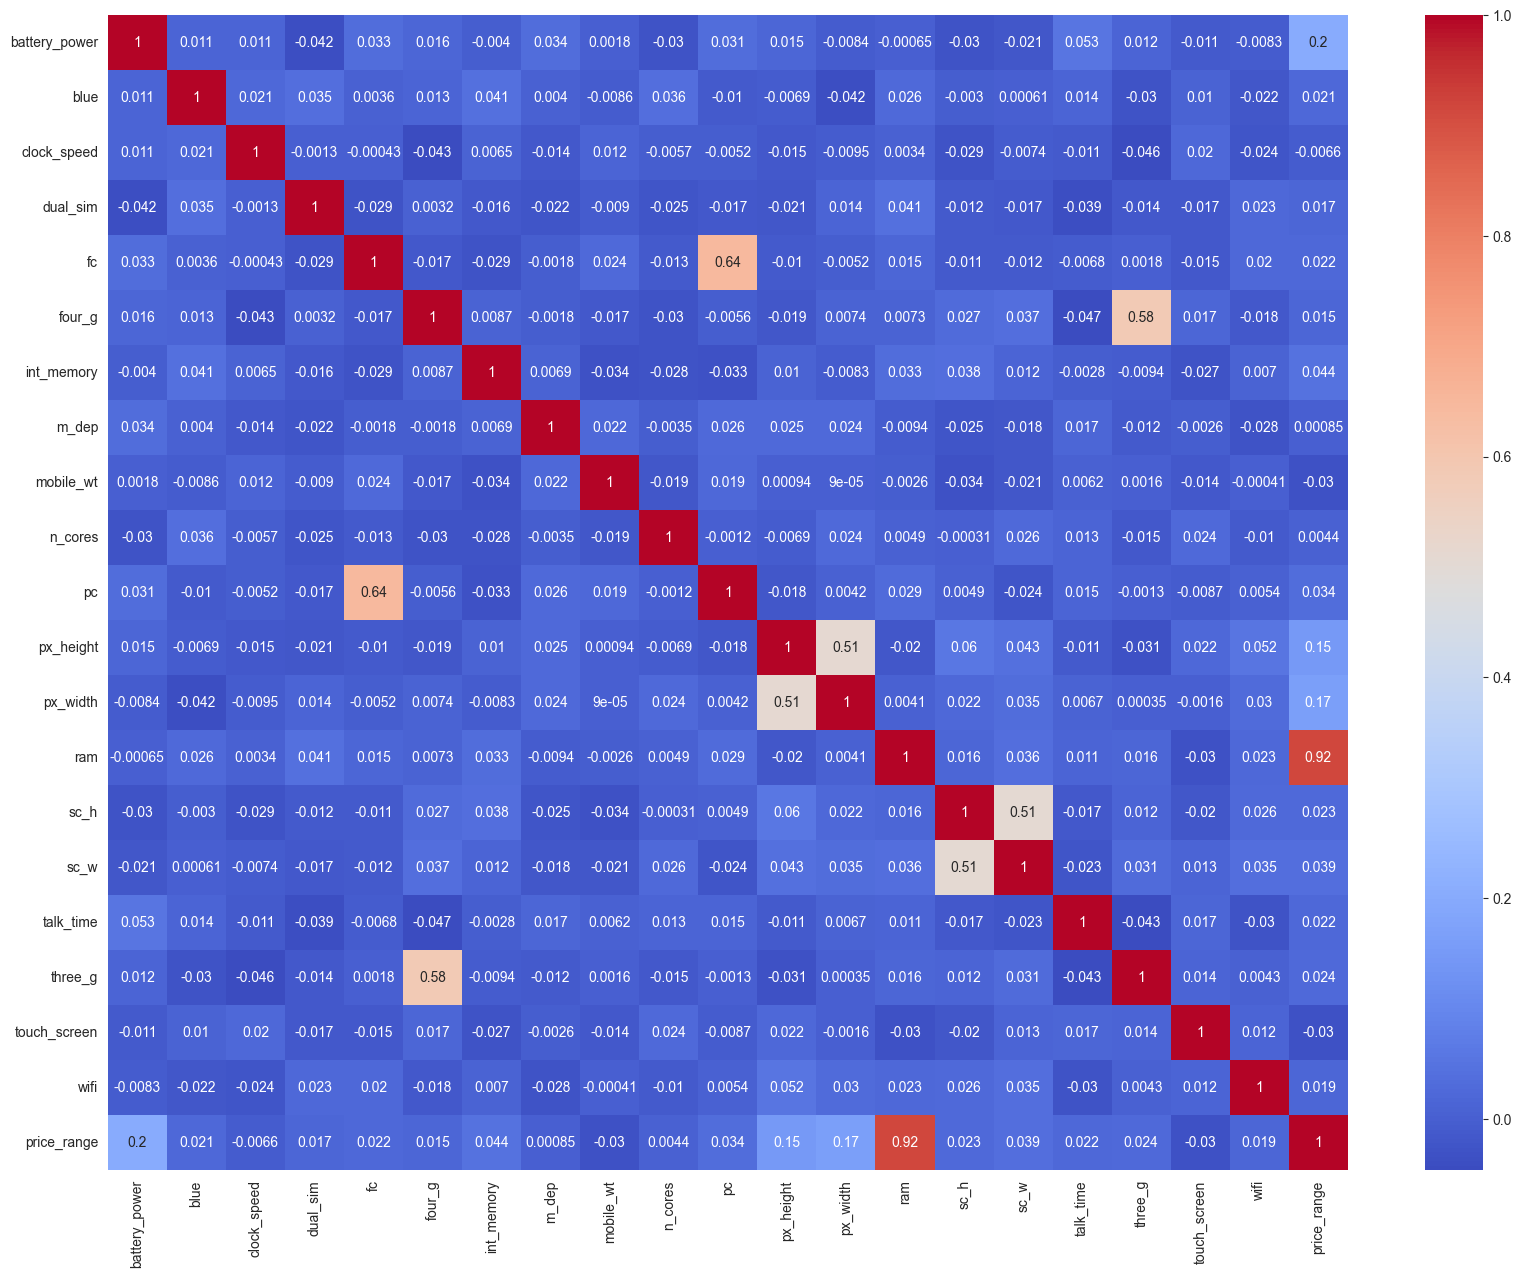

In [5]:
plt.figure(figsize=(20,15 ))

sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

plt.show()

### Features Selected depending on correlation

In [6]:
threshold = 0.004

correlation_matrix = df.corr()

high_corr_features = correlation_matrix.index[abs(correlation_matrix["price_range"]) > threshold].tolist()

high_corr_features.remove("price_range")

print(high_corr_features)

X_selected = df[high_corr_features]

Y = df["price_range"]

['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']


In [7]:
X_selected.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width',
       'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi'],
      dtype='object')

### Scale selected features

In [8]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_selected)

### Split the dataset to 80% training and 20% testing

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [10]:
X_train

array([[ 1.55808903, -0.9900495 , -1.2530642 , ...,  0.55964063,
         0.99401789,  0.98609664],
       [-1.37834511,  1.0100505 ,  0.83077942, ...,  0.55964063,
         0.99401789,  0.98609664],
       [-0.00573288, -0.9900495 , -0.76274805, ...,  0.55964063,
        -1.00601811,  0.98609664],
       ...,
       [ 1.34411631,  1.0100505 , -1.2530642 , ...,  0.55964063,
        -1.00601811,  0.98609664],
       [ 1.56719425, -0.9900495 , -0.76274805, ..., -1.78686097,
         0.99401789,  0.98609664],
       [-1.3737925 ,  1.0100505 , -1.13048516, ...,  0.55964063,
        -1.00601811, -1.01409939]], shape=(1600, 19))

In [11]:
Y_train

968     1
240     2
819     0
692     3
420     1
       ..
1130    3
1294    0
860     2
1459    3
1126    1
Name: price_range, Length: 1600, dtype: int64

## Part 1: K-Nearest Neighbors (KNN) 

#### *Note: Done by Qusay Taradeh 1212508

### KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold

k_values = list(range(1, 50))

metric_optimal_k = {}
accuracy_optimal_k = {}

metrics = ['euclidean', 'manhattan', 'cosine']

for metric in metrics:

    accuracy_results_metric = []
    
    for k in k_values:
        # Create a KNN classifier with k neighbors
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)

        # Use KFold cross-validation to evaluate the classifier
        kfold = KFold(n_splits=4, shuffle=True, random_state=0)
        
        # Get the accuracy scores for each fold
        scores = cross_val_score(knn, X_train, Y_train, cv=kfold, scoring='accuracy')
        
        # Add the mean accuracy score to the list
        accuracy_results_metric.append(scores.mean())
    
    # Find the optimal k value
    optimal_k = k_values[accuracy_results_metric.index(max(accuracy_results_metric))]
    
    # Store the optimal k value in the dictionary also accuracy
    metric_optimal_k[metric] = optimal_k
    accuracy_optimal_k[metric] = max(accuracy_results_metric)
    
    print(f"Optimal k for {metric}: {optimal_k}")
    print(f"Accuracy for {metric}: {max(accuracy_results_metric):.4f}")


optimal_accuracy = max(accuracy_optimal_k.values())

# retrieve the optimal metric value
for metric in metrics:
    if accuracy_optimal_k[metric] == optimal_accuracy:
        optimal_metric = metric

# retrieve the optimal k value
optimal_k = metric_optimal_k[optimal_metric]
print(f"Optimal k value: {optimal_k}, Metric: {optimal_metric}")

Optimal k for euclidean: 48
Accuracy for euclidean: 0.6275
Optimal k for manhattan: 48
Accuracy for manhattan: 0.6956
Optimal k for cosine: 42
Accuracy for cosine: 0.6287
Optimal k value: 48, Metric: manhattan


#### Fit, Predict and report results function

In [13]:
def knn_fit_and_predict(X_train, X_test, Y_train, Y_test, optimal_k, optimal_metric):
    # Train the model with optimal k and metric
    knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k, metric=optimal_metric)
    knn_optimal.fit(X_train, Y_train)
    Y_pred = knn_optimal.predict(X_test)
    Y_pred_proba = knn_optimal.predict_proba(X_test)
    
    # Test the model on the test set
    test_accuracy = knn_optimal.score(X_test, Y_test)
    cm = confusion_matrix(Y_test, Y_pred)
    cr = classification_report(Y_test, Y_pred)
    roc_auc = roc_auc_score(Y_test, Y_pred_proba, multi_class='ovr')
    
    print(f"Test Accuracy with k ({optimal_k}) and distance metric ({optimal_metric}): {test_accuracy:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(cr)
    print(f"ROC-AUC Score (Multiclass OVR): {roc_auc:.4f}")

#### Evaluation with Euclidean Distance

In [14]:
metric = 'euclidean'
k = metric_optimal_k[metric]
knn_fit_and_predict(X_train, X_test, Y_train, Y_test, k, metric)

Test Accuracy with k (48) and distance metric (euclidean): 0.6325
Confusion Matrix:
[[77 27  1  0]
 [23 52 16  0]
 [ 1 31 49 11]
 [ 0  1 36 75]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.73      0.75       105
           1       0.47      0.57      0.51        91
           2       0.48      0.53      0.51        92
           3       0.87      0.67      0.76       112

    accuracy                           0.63       400
   macro avg       0.65      0.63      0.63       400
weighted avg       0.66      0.63      0.64       400

ROC-AUC Score (Multiclass OVR): 0.8419


#### Evaluation with Manhattan Distance

In [15]:
metric = 'manhattan'
k = metric_optimal_k[metric]
knn_fit_and_predict(X_train, X_test, Y_train, Y_test, k, metric)

Test Accuracy with k (48) and distance metric (manhattan): 0.7125
Confusion Matrix:
[[89 14  2  0]
 [20 57 14  0]
 [ 1 27 56  8]
 [ 0  1 28 83]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       105
           1       0.58      0.63      0.60        91
           2       0.56      0.61      0.58        92
           3       0.91      0.74      0.82       112

    accuracy                           0.71       400
   macro avg       0.71      0.71      0.71       400
weighted avg       0.73      0.71      0.72       400

ROC-AUC Score (Multiclass OVR): 0.8907


#### Evaluation with Cosine Distance

In [16]:
metric = 'cosine'
k = metric_optimal_k[metric]
knn_fit_and_predict(X_train, X_test, Y_train, Y_test, k, metric)

Test Accuracy with k (42) and distance metric (cosine): 0.6475
Confusion Matrix:
[[90 13  2  0]
 [36 39 14  2]
 [ 3 24 38 27]
 [ 0  2 18 92]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.86      0.77       105
           1       0.50      0.43      0.46        91
           2       0.53      0.41      0.46        92
           3       0.76      0.82      0.79       112

    accuracy                           0.65       400
   macro avg       0.62      0.63      0.62       400
weighted avg       0.63      0.65      0.63       400

ROC-AUC Score (Multiclass OVR): 0.8322


#### Train and Test the model on test set with optimal hyperparameters

In [17]:
knn_fit_and_predict(X_train, X_test, Y_train, Y_test, optimal_k, optimal_metric)

Test Accuracy with k (48) and distance metric (manhattan): 0.7125
Confusion Matrix:
[[89 14  2  0]
 [20 57 14  0]
 [ 1 27 56  8]
 [ 0  1 28 83]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       105
           1       0.58      0.63      0.60        91
           2       0.56      0.61      0.58        92
           3       0.91      0.74      0.82       112

    accuracy                           0.71       400
   macro avg       0.71      0.71      0.71       400
weighted avg       0.73      0.71      0.72       400

ROC-AUC Score (Multiclass OVR): 0.8907


## Part 2: Logistic Regression 

#### *Note: Done by Qusay Taradeh 1212508

#### Evaluation metrics function

In [18]:
def lr_predict_evaluate(X_test, Y_test, logreg):
    # Make prediction
    Y_pred = logreg.predict(X_test)
    Y_pred_proba = logreg.predict_proba(X_test)
    
    # Test the model on the test set
    cm = confusion_matrix(Y_test, Y_pred)
    cr = classification_report(Y_test, Y_pred)
    roc_auc = roc_auc_score(Y_test, Y_pred_proba, multi_class='ovr')
    
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(cr)
    print(f"ROC-AUC Score (Multiclass OVR): {roc_auc:.4f}")

### Training Logistic Regression Model

#### Using L1:

In [19]:
from sklearn.model_selection import GridSearchCV

logreg = LogisticRegression(random_state=42)
hyperparameters = [{'penalty':['l1'], 
                    'solver':['liblinear'],
                    'max_iter':[1000, 2000, 2500, 5000],
                    'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]
                    }]
clf = GridSearchCV(logreg, hyperparameters, cv=5)
best_clf = clf.fit(X_train, Y_train)

In [20]:
best_clf.best_estimator_

LogisticRegression(C=10, max_iter=1000, penalty='l1', random_state=42,
                   solver='liblinear')

### Make Prediction and Evaluation

In [21]:
lr_predict_evaluate(X_test=X_test, Y_test=Y_test, logreg=best_clf)

Confusion Matrix:
[[100   3   2   0]
 [  0  69  22   0]
 [  0  18  72   2]
 [  0   0   1 111]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       105
           1       0.77      0.76      0.76        91
           2       0.74      0.78      0.76        92
           3       0.98      0.99      0.99       112

    accuracy                           0.88       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.88      0.88      0.88       400

ROC-AUC Score (Multiclass OVR): 0.9746


#### Using L2

In [25]:
from sklearn.model_selection import GridSearchCV

logreg = LogisticRegression(random_state=42)
hyperparameters = [{'penalty':['l2'], 
                    'solver':['liblinear'],
                    'max_iter':[1000, 2000, 2500, 5000],
                    'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]
                    }]
clf = GridSearchCV(logreg, hyperparameters, cv=5)
best_clf = clf.fit(X_train, Y_train)

In [26]:
best_clf.best_estimator_

LogisticRegression(C=1000, max_iter=1000, random_state=42, solver='liblinear')

### Make Prediction and Evaluation

In [27]:
lr_predict_evaluate(X_test=X_test, Y_test=Y_test, logreg=best_clf)

Confusion Matrix:
[[100   3   2   0]
 [  0  69  22   0]
 [  0  18  72   2]
 [  0   0   1 111]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       105
           1       0.77      0.76      0.76        91
           2       0.74      0.78      0.76        92
           3       0.98      0.99      0.99       112

    accuracy                           0.88       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.88      0.88      0.88       400

ROC-AUC Score (Multiclass OVR): 0.9740


## Part 3: Support Vector Machines (SVM) 

#### *Note: Done by Ali Khalil 1210750

### Find the Best Hyperparameter for linear kernal

In [28]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid_linear = {'C': [0.1, 1, 10, 100]}

svm_lin = SVC(kernel='linear')
grid_linear = GridSearchCV(svm_lin, param_grid_linear, cv=5)
grid_linear.fit(X_train, Y_train)

print("Best Parameters for Linear Kernel:", grid_linear.best_params_)
print("Best Accuracy for Linear Kernel:", grid_linear.best_score_)

Best Parameters for Linear Kernel: {'C': 10}
Best Accuracy for Linear Kernel: 0.9650000000000001


#### Train the model using the best Hyperparameter (C)

In [29]:
svc_linear = SVC(C=10, kernel='linear', probability=True, random_state=42)
svc_linear.fit(X_train, Y_train)
y_pred_linear = svc_linear.predict(X_test)

accuracy_lin = accuracy_score(y_pred_linear, Y_test)

y_proba_lin = svc_linear.predict_proba(X_test)

print(f"Accuracy: {accuracy_lin:.4f}")

print("Linear Kernel Performance:")
print(classification_report(Y_test, y_pred_linear))

roc_auc_lin = roc_auc_score(Y_test, y_proba_lin, multi_class="ovr")  
print("ROC-AUC Score:", roc_auc_lin)

Accuracy: 0.9775
Linear Kernel Performance:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       105
           1       0.94      1.00      0.97        91
           2       0.99      0.98      0.98        92
           3       0.98      0.99      0.99       112

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400

ROC-AUC Score: 0.9994657187740377


#### Find the best Hyperparameter for Polynomial kernel

In [30]:
param_grid_poly = {
    'C': [0.1, 1, 10],
    'degree': [2, 3, 4],
    'coef0': [0, 1, 2, 3]
}

svm_poly = SVC(kernel='poly')
grid_poly = GridSearchCV(svm_poly, param_grid_poly, cv=5)
grid_poly.fit(X_train, Y_train)

print("Best Parameters for Polynomial Kernel:", grid_poly.best_params_)
print("Best Accuracy for Polynomial Kernel:", grid_poly.best_score_)

Best Parameters for Polynomial Kernel: {'C': 0.1, 'coef0': 3, 'degree': 2}
Best Accuracy for Polynomial Kernel: 0.9175000000000001


#### Train the model using the polynomial kernel Best Hyperparameters 

In [31]:
svc_poly = SVC(C=0.1, coef0=3, degree=2,  kernel='poly', probability=True, random_state=42)
svc_poly.fit(X_train, Y_train)
y_pred_poly = svc_poly.predict(X_test)

accuracy_poly = accuracy_score(y_pred_poly, Y_test)

print(f"Accuracy: {accuracy_poly:.4f}")
print("Polynomial Kernel Performance:")
print(classification_report(Y_test, y_pred_poly))

y_proba_pol = svc_poly.predict_proba(X_test)

roc_auc_poly = roc_auc_score(Y_test, y_proba_pol, multi_class="ovr")  
print("ROC-AUC Score:", roc_auc_poly)

Accuracy: 0.9450
Polynomial Kernel Performance:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       105
           1       0.92      0.96      0.94        91
           2       0.90      0.96      0.93        92
           3       0.98      0.93      0.95       112

    accuracy                           0.94       400
   macro avg       0.94      0.95      0.94       400
weighted avg       0.95      0.94      0.95       400

ROC-AUC Score: 0.9976984995120208


#### Find the best Hyperparameter for RBF kernel

In [32]:
param_grid_rbf = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001]
}
svm_rbf = SVC(kernel='rbf')
grid_rbf = GridSearchCV(svm_rbf, param_grid_rbf, cv=5)
grid_rbf.fit(X_train, Y_train)

print("Best Parameters for RBF Kernel:", grid_rbf.best_params_)
print("Best Accuracy for RBF Kernel:", grid_rbf.best_score_)

Best Parameters for RBF Kernel: {'C': 10, 'gamma': 0.01}
Best Accuracy for RBF Kernel: 0.914375


#### Train the model using the RBF kernel Best Hyperparameters 

In [33]:
svc_rbf = SVC(C=10, gamma=0.01, kernel='rbf', probability=True, random_state=42)
svc_rbf.fit(X_train, Y_train)
y_pred_rbf = svc_rbf.predict(X_test)

accuracy_rbf = accuracy_score(y_pred_poly, Y_test)

print(f"Accuracy: {accuracy_rbf:.4f}")
print("RBF Kernel Performance:")
print(classification_report(Y_test, y_pred_rbf))

y_proba_rbf = svc_rbf.predict_proba(X_test)

roc_auc_rbf = roc_auc_score(Y_test, y_proba_rbf, multi_class="ovr")  
print("ROC-AUC Score:", roc_auc_rbf)

Accuracy: 0.9450
RBF Kernel Performance:
              precision    recall  f1-score   support

           0       0.98      0.93      0.96       105
           1       0.87      0.95      0.91        91
           2       0.89      0.89      0.89        92
           3       0.96      0.94      0.95       112

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400

ROC-AUC Score: 0.9957328439683872


#### Comparison between different kernels

In [34]:
metrics_summary = pd.DataFrame({
    'Kernel': ['Linear', 'Polynomial', 'RBF'],
    'Accuracy': [
        accuracy_score(Y_test, y_pred_linear),
        accuracy_score(Y_test, y_pred_poly),
        accuracy_score(Y_test, y_pred_rbf)
    ]
})
print(metrics_summary)

       Kernel  Accuracy
0      Linear    0.9775
1  Polynomial    0.9450
2         RBF    0.9275


## Part 4: Ensemble Methods 

#### *Note: Done by Ali Khalil 1210750

#### Finding the best Hyperparameter for Boosting

In [35]:
from sklearn.ensemble import AdaBoostClassifier

# Define parameter grid
param_grid_ada = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1]
}

# Perform Grid Search
ada = AdaBoostClassifier(random_state=42)
grid_ada = GridSearchCV(ada, param_grid_ada, cv=5, scoring='accuracy')
grid_ada.fit(X_train, Y_train)

# Best Parameters and Score
print("Best Parameters for AdaBoost:", grid_ada.best_params_)
print("Best Accuracy for AdaBoost:", grid_ada.best_score_)

Best Parameters for AdaBoost: {'learning_rate': 0.1, 'n_estimators': 150}
Best Accuracy for AdaBoost: 0.74375


#### Training the adaboost model using the best hyperparameters

In [36]:
adaboost = AdaBoostClassifier(n_estimators=150, learning_rate= 0.1, random_state=42)
adaboost.fit(X_train, Y_train)

y_pred_boost = adaboost.predict(X_test)
boost_accuracy = accuracy_score(Y_test, y_pred_boost) 

boost_report = classification_report(Y_test, y_pred_boost)

print("AdaBoost Accuracy:", boost_accuracy)
print("\nClassification Report for Random Forest:\n", boost_report)

y_proba_bost = adaboost.predict_proba(X_test)

roc_auc = roc_auc_score(Y_test, y_proba_bost, multi_class="ovr")  
print("ROC-AUC Score:", roc_auc)

AdaBoost Accuracy: 0.7575

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.87      0.86      0.87       105
           1       0.72      0.69      0.70        91
           2       0.64      0.59      0.61        92
           3       0.77      0.86      0.81       112

    accuracy                           0.76       400
   macro avg       0.75      0.75      0.75       400
weighted avg       0.76      0.76      0.76       400

ROC-AUC Score: 0.8665381181080573


#### Finding the best Hyperparameter for Bagging (Random Forest)

In [37]:
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, Y_train)

print("Best Parameters for Random Forest:", grid_rf.best_params_)

print("Best Accuracy for Random Forest:", grid_rf.best_score_)

Best Parameters for Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy for Random Forest: 0.8787500000000001


#### Training the Random Forest model on the dataset using the best hyperparameters

In [38]:
random_forest = RandomForestClassifier(n_estimators=100, min_samples_leaf=2, min_samples_split=2, max_features="sqrt", max_depth=None, random_state=42)
random_forest.fit(X_train, Y_train)

y_pred_forest = random_forest.predict(X_test)
forest_accuracy = accuracy_score(Y_test, y_pred_forest)
forest_report = classification_report(Y_test, y_pred_forest)

print("Random Forest Accuracy:", forest_accuracy)
print("\nClassification Report for Random Forest:\n", forest_report)

y_proba_for = random_forest.predict_proba(X_test)

roc_auc = roc_auc_score(Y_test, y_proba_for, multi_class="ovr")  
print("ROC-AUC Score:", roc_auc)

Random Forest Accuracy: 0.8925

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       105
           1       0.89      0.85      0.87        91
           2       0.79      0.87      0.83        92
           3       0.93      0.89      0.91       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.89      0.89       400

ROC-AUC Score: 0.9837286033630085
